In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
data= pd.read_csv('C:/Users/HARSHA/Downloads/shipments.csv')
data.head(10).append(data.tail(10))

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


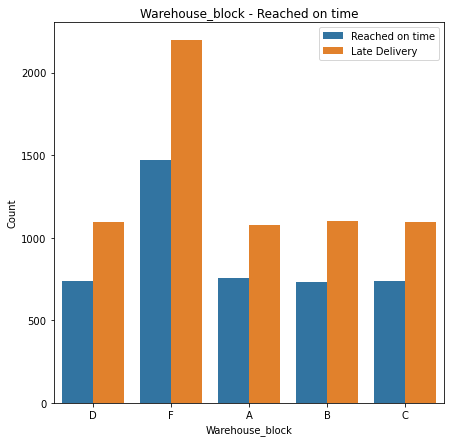

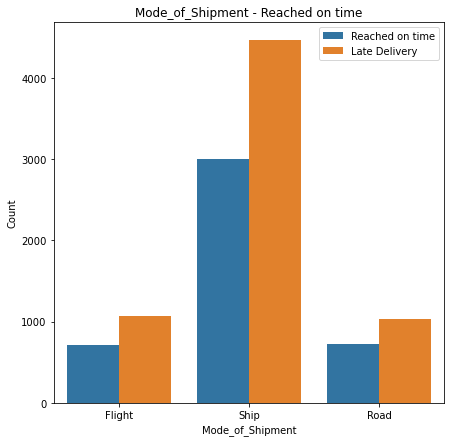

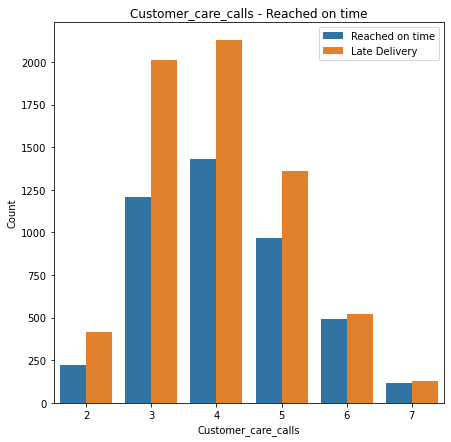

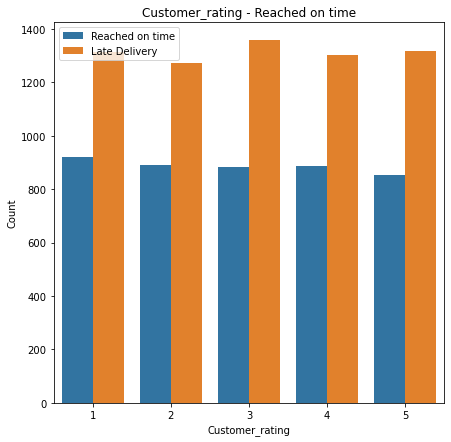

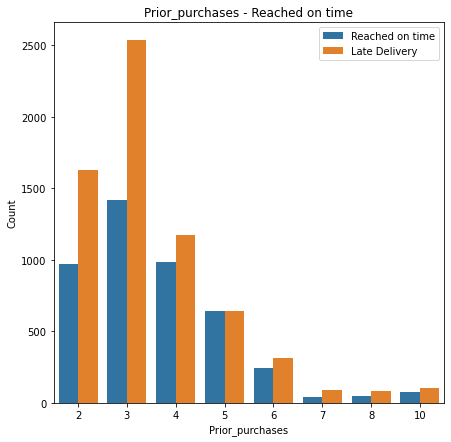

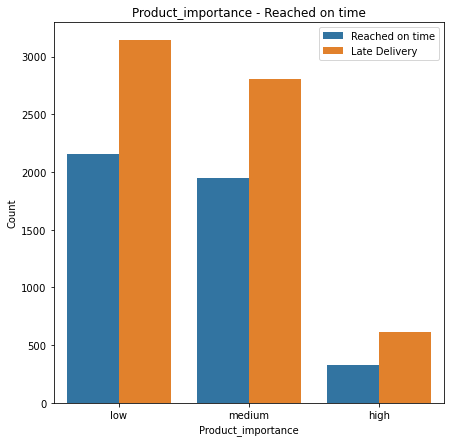

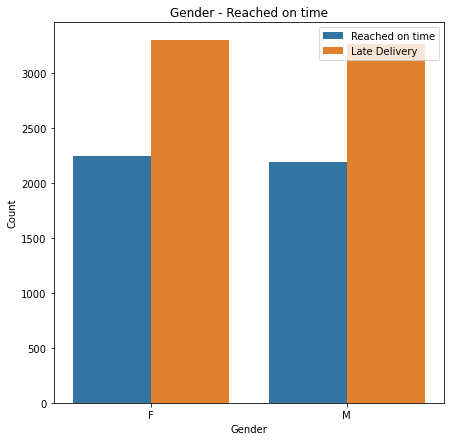

In [3]:
Obj = ["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender"]
for f in Obj:
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(x=f,data=data,hue="Reached.on.Time_Y.N")
    ax.legend(["Reached on time","Late Delivery"])
    plt.ylabel("Count")
    plt.xlabel(f"{f}")
    plt.title("{} - Reached on time".format(f))
    plt.show()

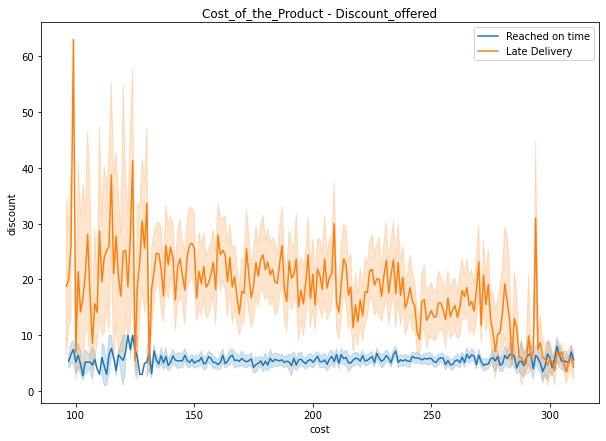

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x="Cost_of_the_Product",y="Discount_offered",hue="Reached.on.Time_Y.N",data=data)
ax.legend(["Reached on time","Late Delivery"])
plt.ylabel("discount")
plt.xlabel("cost")
plt.title("Cost_of_the_Product - Discount_offered")
plt.show()

Customers who received a discount of more than 10$ did not receive on time delivery.

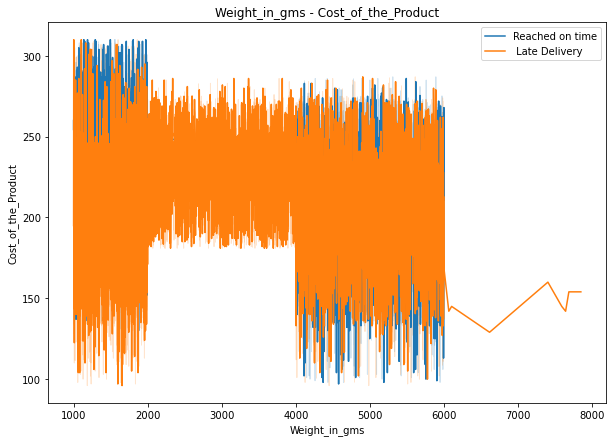

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=data)
ax.legend(["Reached on time"," Late Delivery"])
plt.ylabel("Cost_of_the_Product")
plt.xlabel("Weight_in_gms")
plt.title("Weight_in_gms - Cost_of_the_Product")
plt.show()

2000-3000 and after 6000gms weighted products not reached on time

# EDA

In [6]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached.on.Time_Y.N    10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


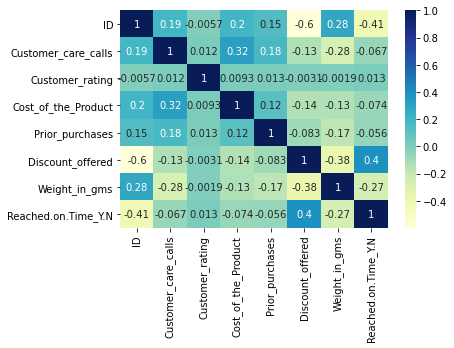

In [8]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Missing Values

<AxesSubplot:>

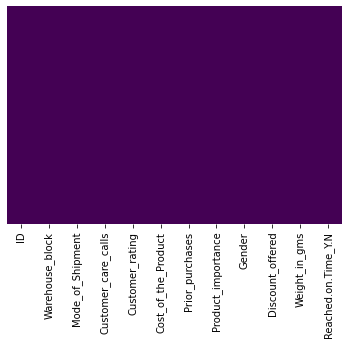

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have 'zero' missing values

In [6]:
data.duplicated().sum()

0

### Handling Outliers

<AxesSubplot:>

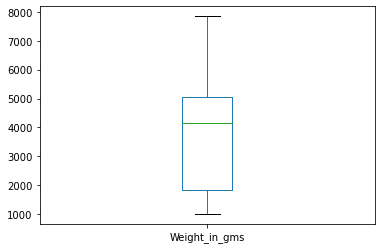

In [11]:
data.boxplot(column =['Weight_in_gms'], grid = False)

<AxesSubplot:>

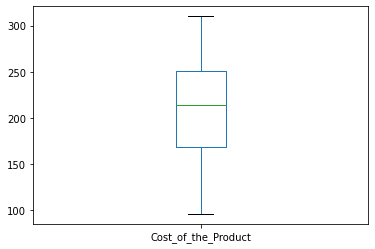

In [12]:
data.boxplot(column =['Cost_of_the_Product'], grid = False)

<AxesSubplot:>

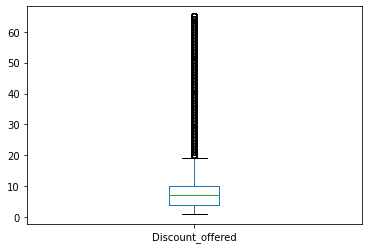

In [13]:
data.boxplot(column =['Discount_offered'], grid = False)

we have more outliers for discount offered

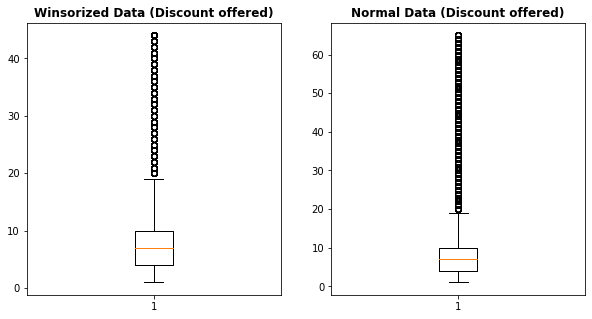

In [14]:
#Handling Outliers with winsorization
from scipy.stats.mstats import winsorize
data_win= winsorize(data["Discount_offered"],(0,0.10))

#Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data_win)
plt.title("Winsorized Data (Discount offered)",fontsize=12,fontweight="bold")
plt.subplot(1,2,2)
plt.boxplot(data["Discount_offered"].values)
plt.title("Normal Data (Discount offered)",fontsize=12,fontweight="bold")
plt.show()

In [15]:
winsorized_data = data
winsorized_data["Discount_offered"] = data_win

In [16]:
# Drop ID column
data = data.drop('ID', axis=1)

### Encoding

In [17]:
#label encoding
data["Gender"].replace({"M":1,"F":0},inplace=True)
data.Gender=data.Gender.astype(str).str.strip()

In [18]:
#one hot encoding
data = pd.get_dummies(data, columns=["Warehouse_block"])
data = pd.get_dummies(data, columns=["Mode_of_Shipment"])
data = pd.get_dummies(data, columns=["Product_importance"])

In [19]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,44,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,44,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,44,2484,1,0,0,1,0,0,1,0,0,0,0,1


In [20]:
x = data.drop("Reached.on.Time_Y.N",axis=1)   #Feature Matrix
y = data["Reached.on.Time_Y.N"]

In [21]:
#Split the Dataset
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.9, shuffle=True, random_state=1)
x_train.shape,x_test.shape

((9899, 18), (1100, 18))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Model Building

In [23]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_test,y_test)

LogisticRegression()

In [24]:
score = log_reg.score(x_test, y_test)
print("accuracy = ", score*100,"%")

accuracy =  68.81818181818183 %


In [25]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.17923171  0.12773302 -0.07046983 -0.0789334   0.16197954  1.36791453
  -0.55098881  0.08511758  0.06578177 -0.01328764 -0.04101549 -0.07606218
   0.07932022 -0.00730772 -0.05677046  0.00421616  0.01905567 -0.02161187]]
[0.79863614]


In [26]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [27]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[251, 169],
       [174, 506]], dtype=int64)